In [25]:
!pip install numpy pandas scikit-learn xgboost matplotlib seaborn


In [26]:

import pandas as pd
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE
import joblib



In [27]:
df = pd.read_csv('/content/heart.csv')

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   sex       920 non-null    object 
 3   dataset   920 non-null    object 
 4   cp        920 non-null    object 
 5   trestbps  861 non-null    float64
 6   chol      890 non-null    float64
 7   fbs       830 non-null    object 
 8   restecg   918 non-null    object 
 9   thalch    865 non-null    float64
 10  exang     865 non-null    object 
 11  oldpeak   858 non-null    float64
 12  slope     611 non-null    object 
 13  ca        309 non-null    float64
 14  thal      434 non-null    object 
 15  num       920 non-null    int64  
dtypes: float64(5), int64(3), object(8)
memory usage: 115.1+ KB


In [29]:
df.describe()

,id,age,trestbps,chol,thalch,oldpeak,ca,num
count,920.000000,920.000000,861.000000,890.000000,865.000000,858.000000,309.000000,920.000000
mean,460.500000,53.510870,132.132404,199.130337,137.545665,0.878788,0.676375,0.995652
std,265.725422,9.424685,19.066070,110.780810,25.926276,1.091226,0.935653,1.142693
min,1.000000,28.000000,0.000000,0.000000,60.000000,-2.600000,0.000000,0.000000
25%,230.750000,47.000000,120.000000,175.000000,120.000000,0.000000,0.000000,0.000000
50%,460.500000,54.000000,130.000000,223.000000,140.000000,0.500000,0.000000,1.000000
75%,690.250000,60.000000,140.000000,268.000000,157.000000,1.500000,1.000000,2.000000
max,920.000000,77.000000,200.000000,603.000000,202.000000,6.200000,3.000000,4.000000


In [30]:
df.columns


Index(['id', 'age', 'sex', 'dataset', 'cp', 'trestbps', 'chol', 'fbs',
       'restecg', 'thalch', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num'],
      dtype='object')

In [31]:
df.head()


,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


In [32]:
df.nunique()


,0
id,920
age,50
sex,2
dataset,4
cp,4
trestbps,61
chol,217
fbs,2
restecg,3
thalch,119


In [33]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
for column in df.columns:
    if df[column].dtype == 'object':  # object = text
        df[column] = le.fit_transform(df[column])


In [34]:
correlation = df.corr()
print(correlation)


                id       age       sex   dataset        cp  trestbps  \
id        1.000000  0.239301  0.280053  0.949062 -0.189430  0.052924   
age       0.239301  1.000000  0.056889  0.235076 -0.076519  0.244253   
sex       0.280053  0.056889  1.000000  0.285734 -0.125933  0.001087   
dataset   0.949062  0.235076  0.285734  1.000000 -0.150334  0.021227   
cp       -0.189430 -0.076519 -0.125933 -0.150334  1.000000 -0.023508   
trestbps  0.052924  0.244253  0.001087  0.021227 -0.023508  1.000000   
chol     -0.376936 -0.086234 -0.197281 -0.416648  0.065279  0.092853   
fbs       0.291005  0.125887  0.106900  0.293678 -0.078563 -0.011590   
restecg   0.477040 -0.013094  0.074900  0.456794 -0.064280  0.014034   
thalch   -0.466427 -0.365778 -0.179320 -0.414609  0.300812 -0.104899   
exang     0.399679  0.250938  0.207197  0.399767 -0.241050  0.152328   
oldpeak   0.049930  0.258243  0.103930  0.053002 -0.181486  0.161908   
slope     0.115371 -0.222399 -0.033180  0.131545  0.183725 -0.02

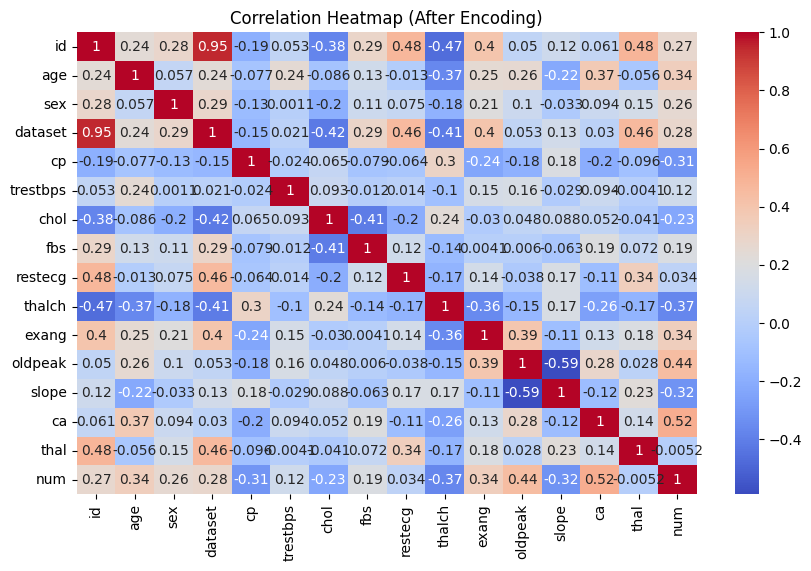

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap (After Encoding)")
plt.show()


In [36]:
df.drop(columns= ['id','restecg','fbs'], inplace= True)
df.columns

Index(['age', 'sex', 'dataset', 'cp', 'trestbps', 'chol', 'thalch', 'exang',
       'oldpeak', 'slope', 'ca', 'thal', 'num'],
      dtype='object')

In [37]:
df.isnull().sum()

,0
age,0
sex,0
dataset,0
cp,0
trestbps,59
chol,30
thalch,55
exang,0
oldpeak,62
slope,0


In [38]:
# For trestbps :
median_trestbps = df['trestbps'].median()
df['trestbps'] = df['trestbps'].fillna(median_trestbps)



In [39]:
# For chol:
median_chol = df['chol'].median()
df['chol'] = df['chol'].fillna(median_chol)



In [40]:
# For thalch :
median_thalch = df['thalch'].median()
df['thalch'] = df['thalch'].fillna(median_thalch)




In [41]:
# For oldpeak :
median_oldpeak = df['oldpeak'].median()
df['oldpeak'] = df['oldpeak'].fillna(median_oldpeak)
df


,age,sex,dataset,cp,trestbps,chol,thalch,exang,oldpeak,slope,ca,thal,num
0,63,1,0,3,145.0,233.0,150.0,0,2.3,0,0.0,0,0
1,67,1,0,0,160.0,286.0,108.0,1,1.5,1,3.0,1,2
2,67,1,0,0,120.0,229.0,129.0,1,2.6,1,2.0,2,1
3,37,1,0,2,130.0,250.0,187.0,0,3.5,0,0.0,1,0
4,41,0,0,1,130.0,204.0,172.0,0,1.4,2,0.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
915,54,0,3,0,127.0,333.0,154.0,0,0.0,3,NaN,3,1
916,62,1,3,3,130.0,139.0,140.0,2,0.5,3,NaN,3,0
917,55,1,3,0,122.0,223.0,100.0,0,0.0,3,NaN,0,2
918,58,1,3,0,130.0,385.0,140.0,2,0.5,3,NaN,3,0


In [42]:
# Is there any missing value ?
df.isnull().sum()

,0
age,0
sex,0
dataset,0
cp,0
trestbps,0
chol,0
thalch,0
exang,0
oldpeak,0
slope,0


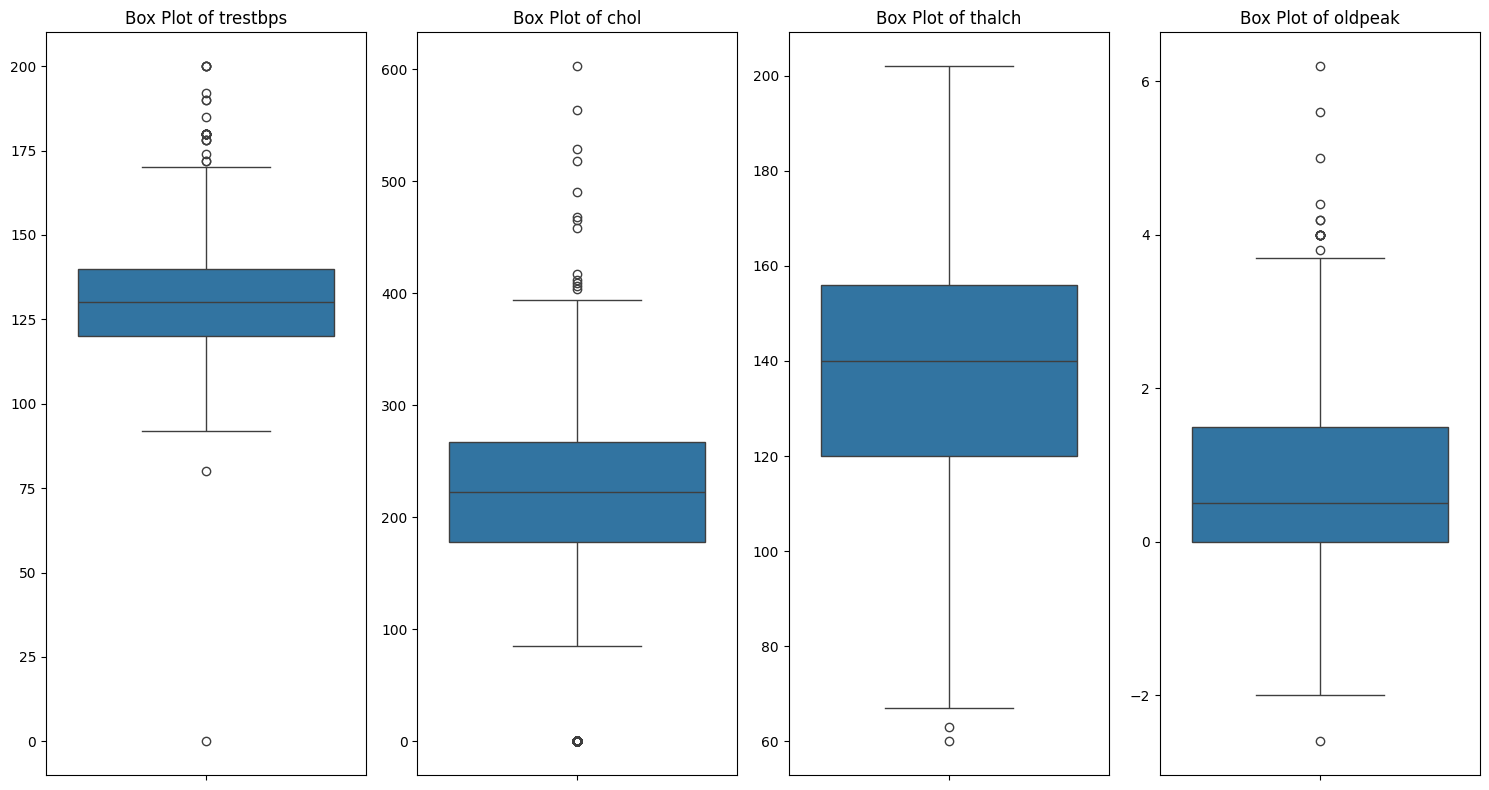

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns

# what column we want to  examine  :
numerical_cols = ['trestbps', 'chol', 'thalch', 'oldpeak']

# create Box Plot :
plt.figure(figsize=(15, 8))
for i, col in enumerate(numerical_cols):
    plt.subplot(1, 4, i+1) # 1 row, 4 columns
    sns.boxplot(y=df[col])
    plt.title(f'Box Plot of {col}')
    plt.ylabel('')
plt.tight_layout()
plt.show()

In [44]:
# Apply the method of Capping :
for col in numerical_cols:
    # 1. count IQR
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    # 2. count Upper and Lower bound :

    upper_bound = Q3 + 1.5 * IQR
    lower_bound = Q1 - 1.5 * IQR

    # 3. Apply Capping :

    df[col] = df[col].clip(upper=upper_bound, lower=lower_bound)



In [45]:
import numpy as np

# Apply log Transformation

for col in ['trestbps', 'chol']:

    df[col] = np.log(df[col])

In [46]:
# Number column selection for skelling
cols_to_scale = ['age', 'trestbps', 'chol', 'thalch', 'oldpeak']

In [47]:
from sklearn.preprocessing import StandardScaler
import pandas as pd


scaler = StandardScaler()

df[cols_to_scale] = scaler.fit_transform(df[cols_to_scale])

print(df[cols_to_scale].head())

        age  trestbps      chol    thalch   oldpeak
0  1.007386  0.814054  0.422644  0.489901  1.424838
1  1.432034  1.583048  0.720060 -1.183228  0.642124
2  1.432034 -0.664268  0.397516 -0.346663  1.718356
3 -1.752828 -0.038990  0.524837  1.963848  2.598910
4 -1.328180 -0.038990  0.229761  1.366302  0.544284


In [48]:
#handling outliers
Q1 = df['age'].quantile(0.25)
Q3 = df['age'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df = df[(df['age'] >= lower_bound) & (df['age'] <= upper_bound)]
df.shape

(920, 13)

In [49]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


num_cols = ['age', 'trestbps', 'chol', 'thalch', 'oldpeak']

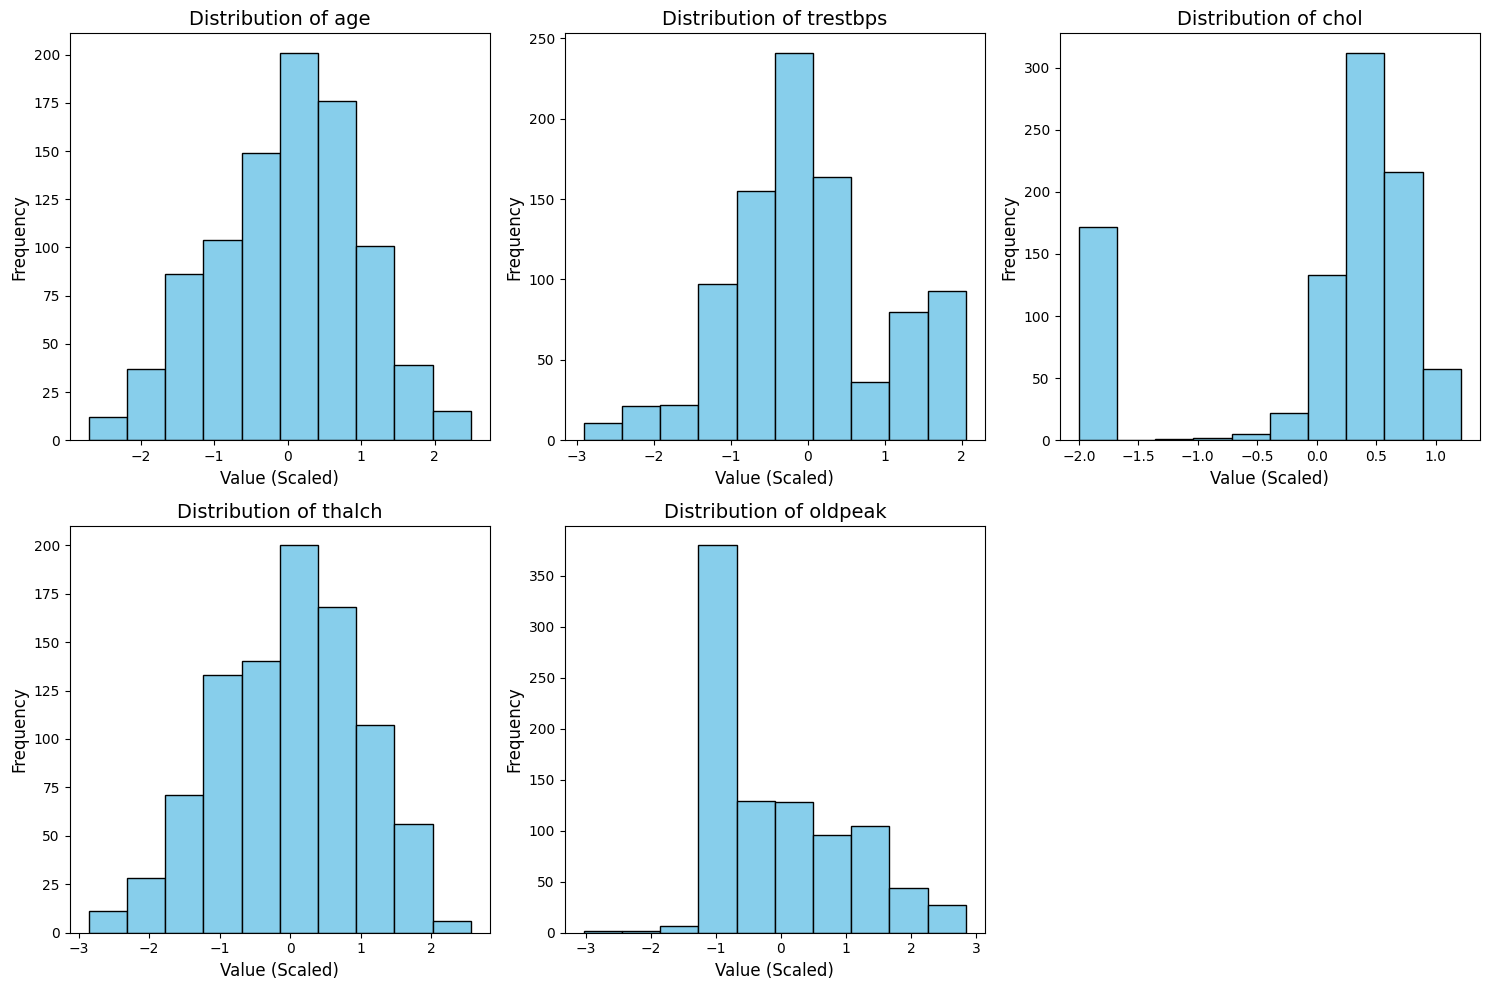

In [50]:

num_cols = ['age', 'trestbps', 'chol', 'thalch', 'oldpeak']


fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))
axes = axes.flatten()


for i, col in enumerate(num_cols):
    axes[i].hist(df[col], edgecolor='black', color='skyblue')
    axes[i].set_title(f'Distribution of {col}', fontsize=14)
    axes[i].set_xlabel('Value (Scaled)', fontsize=12)
    axes[i].set_ylabel('Frequency', fontsize=12)


axes[len(num_cols)].axis('off')

plt.tight_layout()
plt.show()

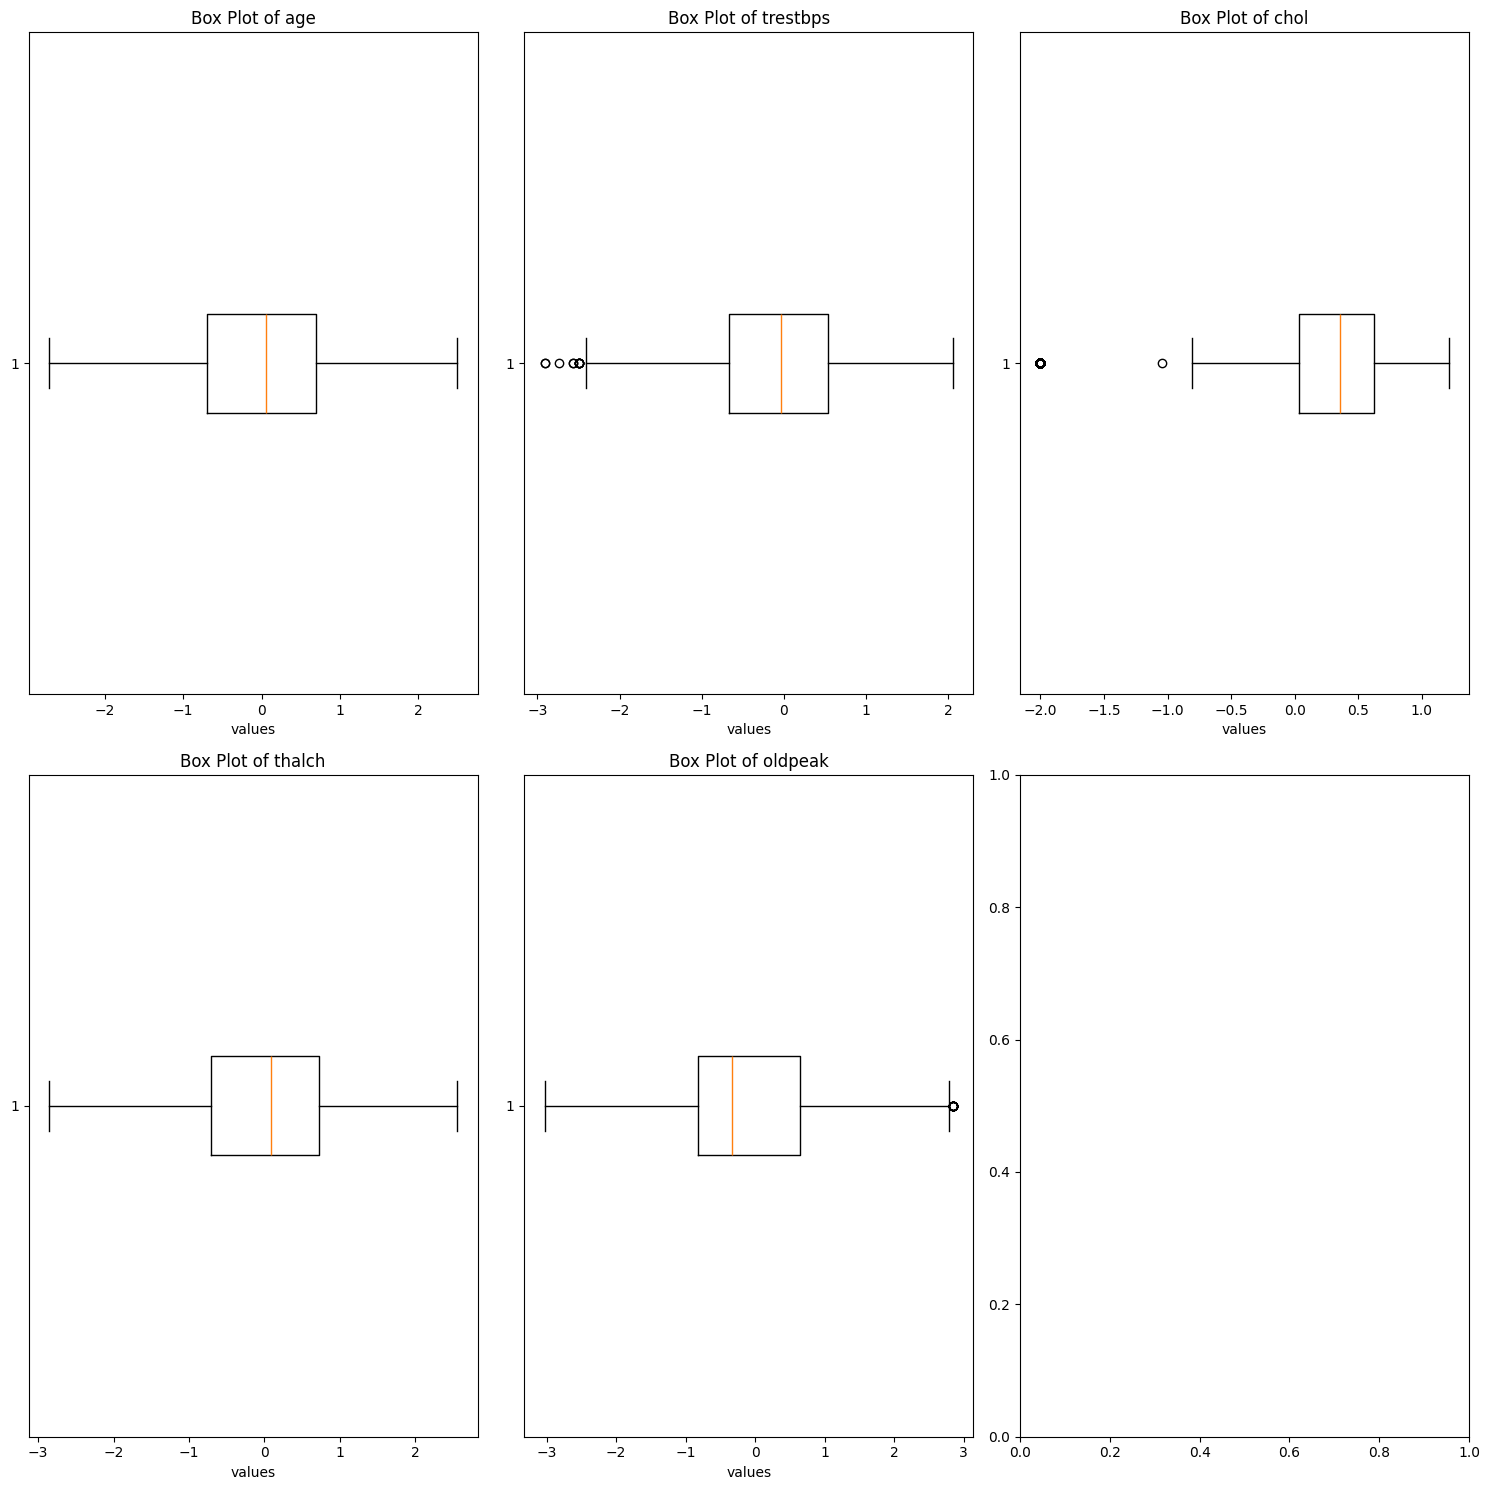

In [51]:
#box plot
fig, axes = plt.subplots(nrows= 2, ncols=3, figsize=(15,15))
axes = axes.flatten()
for i, col in enumerate(num_cols[:len(axes)]):
    axes[i].boxplot(df[col], vert= False)
    axes[i].set_title(f"Box Plot of {col}")
    axes[i].set_xlabel("values")

plt.tight_layout()
plt.show()

In [52]:
#handling outliers
Q1 = df['trestbps'].quantile(0.25)
Q3 = df['trestbps'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df = df[(df['trestbps'] >= lower_bound) & (df['trestbps'] <= upper_bound)]
df.shape

(909, 13)

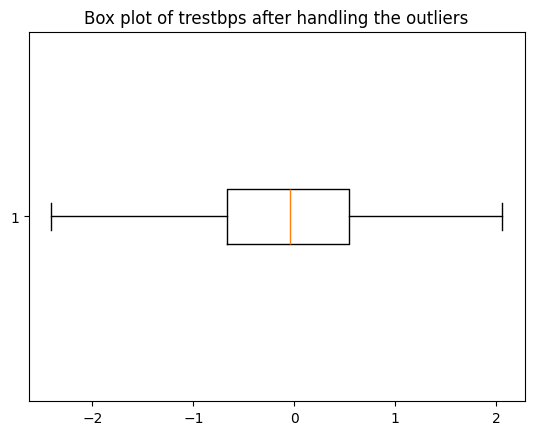

In [53]:
plt.boxplot(df['trestbps'],vert = False)
plt.title("Box plot of trestbps after handling the outliers")
plt.show()

In [54]:
#correlation
corr_matrix = df.corr(numeric_only = True).round(2)
corr_matrix

,age,sex,dataset,cp,trestbps,chol,thalch,exang,oldpeak,slope,ca,thal,num
age,1.00,0.06,0.24,-0.07,0.24,-0.12,-0.35,0.25,0.24,-0.22,0.37,-0.05,0.34
sex,0.06,1.00,0.29,-0.13,0.02,-0.19,-0.17,0.21,0.10,-0.03,0.09,0.15,0.26
dataset,0.24,0.29,1.00,-0.15,0.03,-0.43,-0.38,0.41,0.02,0.14,0.03,0.46,0.27
cp,-0.07,-0.13,-0.15,1.00,-0.01,0.09,0.29,-0.24,-0.18,0.18,-0.20,-0.09,-0.32
trestbps,0.24,0.02,0.03,-0.01,1.00,0.05,-0.10,0.11,0.18,-0.05,0.09,0.01,0.13
chol,-0.12,-0.19,-0.43,0.09,0.05,1.00,0.26,-0.05,0.05,0.10,0.01,-0.03,-0.26
thalch,-0.35,-0.17,-0.38,0.29,-0.10,0.26,1.00,-0.26,-0.15,0.18,-0.26,-0.16,-0.35
exang,0.25,0.21,0.41,-0.24,0.11,-0.05,-0.26,1.00,0.26,-0.11,0.12,0.19,0.34
oldpeak,0.24,0.10,0.02,-0.18,0.18,0.05,-0.15,0.26,1.00,-0.59,0.27,0.01,0.41
slope,-0.22,-0.03,0.14,0.18,-0.05,0.10,0.18,-0.11,-0.59,1.00,-0.12,0.24,-0.32


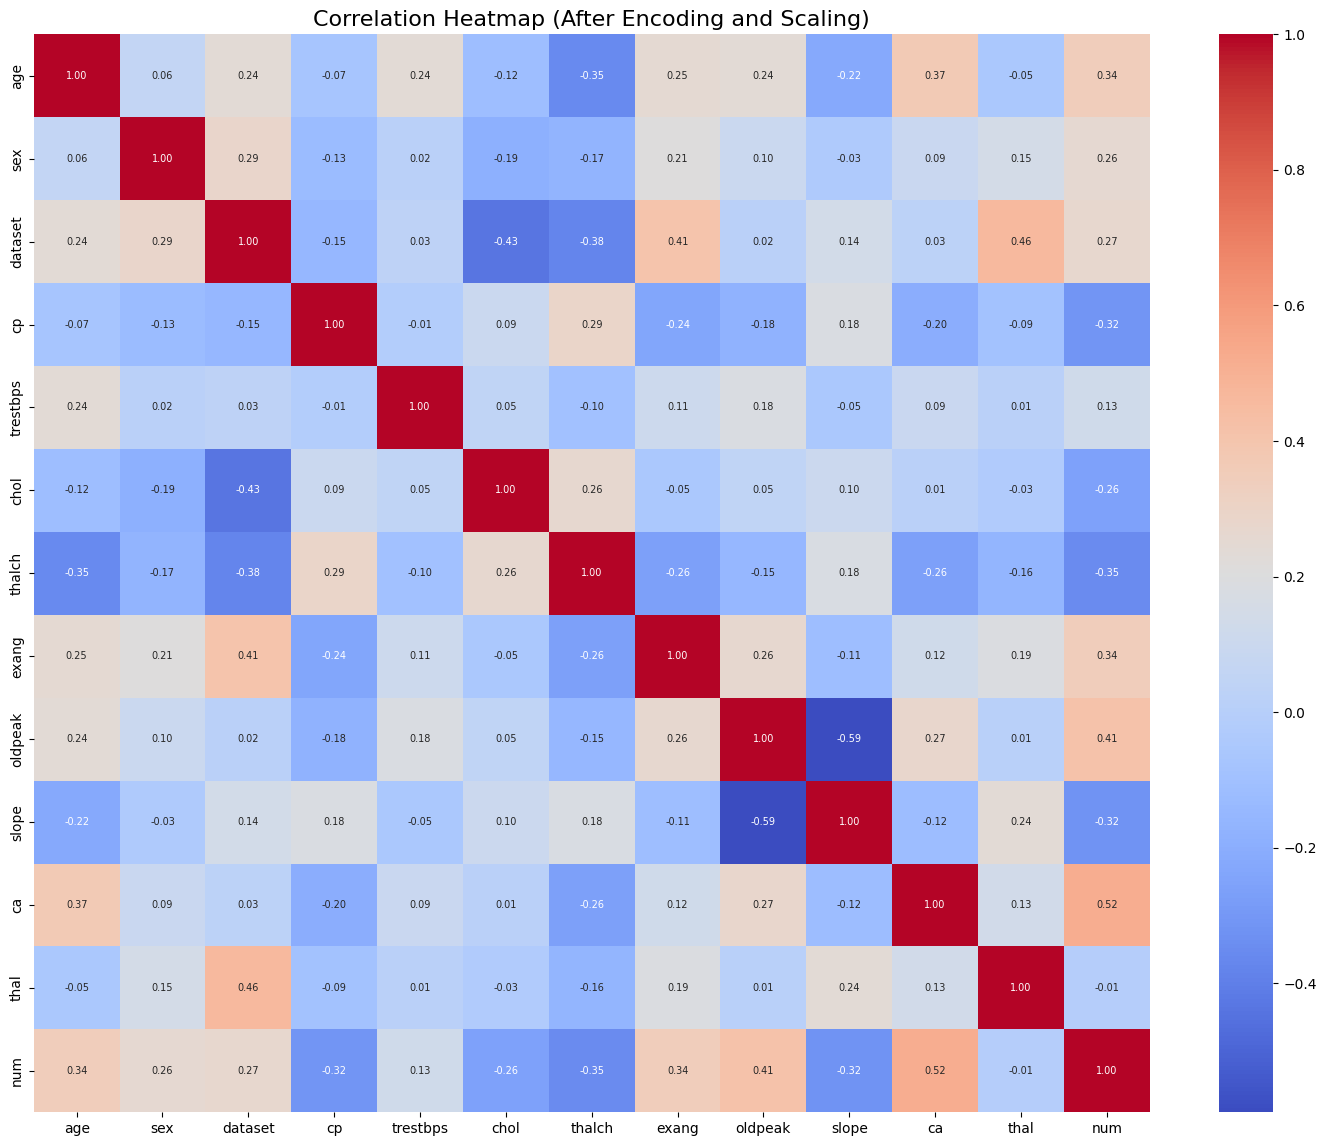

In [55]:

import matplotlib.pyplot as plt
import seaborn as sns

corr_matrix = df.corr()


plt.figure(figsize=(18, 14))


sns.heatmap(
    corr_matrix,
    annot=True,
    annot_kws={"size": 7},
    cmap='coolwarm',
    fmt=".2f"
)

plt.title("Correlation Heatmap (After Encoding and Scaling)", fontsize=16)
plt.show()

In [62]:
# Define X (independent variables) and y (target variable)
X = df[['age',  'trestbps', 'chol', 'thalch', 'oldpeak', 'slope']]
y = df['num']  # Assuming 'num' is the target



# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Scale the features
# scaler = StandardScaler()
# X_train_scaled = scaler.fit_transform(X_train)
# X_test_scaled = scaler.transform(X_test)


# Create a list of models to evaluate
models = [
    ('Random Forest', RandomForestClassifier(random_state=42)),
    ('Support Vector Machine', SVC(random_state=42)),
    ('Logistic Regression', LogisticRegression(random_state=42)),
    ('XG Boost', XGBClassifier(random_state=42)),
]

best_model = None
best_accuracy = 0.0

# Iterate over the models and evaluate their performance
for name, model in models:
    # Create a pipeline for each model
    pipeline = Pipeline([
        ('imputer', IterativeImputer(random_state=42)), # Add IterativeImputer here
        ('scaler', StandardScaler()), # Add StandardScaler here
        ('model', model)
    ])

    # Perform cross-validation
    scores = cross_val_score(pipeline, X_train, y_train, cv=5)

    # Calculate mean accuracy
    mean_accuracy = scores.mean()

    # Fit the pipeline on the training data
    pipeline.fit(X_train, y_train) # Fit on original X_train

    # Make predictions on the test data
    y_pred = pipeline.predict(X_test) # Predict on original X_test

    # Calculate accuracy score
    accuracy = accuracy_score(y_test, y_pred)

    # Print the performance metrics
    print("Model:", name)
    print("Cross-validation Accuracy:", mean_accuracy)
    print("Test Accuracy:", accuracy)
    print()

    # Check if the current model has the best accuracy
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_model = pipeline

# Retrieve the best model
print("Best Model:", best_model)

Model: Random Forest
Cross-validation Accuracy: 0.5350118091639111
Test Accuracy: 0.5494505494505495

Model: Support Vector Machine
Cross-validation Accuracy: 0.5707982994803967
Test Accuracy: 0.5439560439560439

Model: Logistic Regression
Cross-validation Accuracy: 0.5529050543221541
Test Accuracy: 0.510989010989011

Model: XG Boost
Cross-validation Accuracy: 0.5075484175720358
Test Accuracy: 0.5384615384615384

Best Model: Pipeline(steps=[('imputer', IterativeImputer(random_state=42)),
                ('scaler', StandardScaler()),
                ('model', RandomForestClassifier(random_state=42))])


In [58]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, mean_absolute_error, mean_squared_error, r2_score

# to perform statistical test
from sklearn.feature_selection import chi2 # for categorical fetures
from sklearn.feature_selection import f_classif # for numerical features (Anova f-test)

# impot pipeline
from sklearn.pipeline import Pipeline

import warnings
warnings.filterwarnings('ignore')

from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

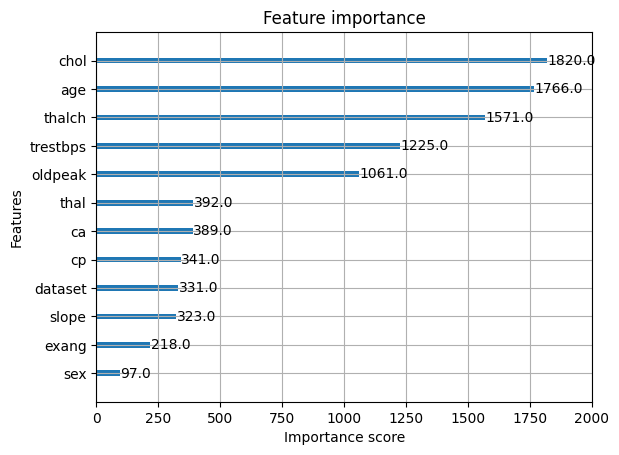

In [61]:
# Feature importance check (for XGBoost)
import matplotlib.pyplot as plt
from xgboost import plot_importance

model = XGBClassifier(random_state=42)
model.fit(X, y)
plot_importance(model)
plt.show()


In [63]:
# কম গুরুত্বপূর্ণ কলাম বাদ দিচ্ছি
X_selected = df.drop(['sex', 'exang', 'slope', 'dataset', 'cp', 'num'], axis=1)
y = df['num']

print(X_selected.columns)


Index(['age', 'trestbps', 'chol', 'thalch', 'oldpeak', 'ca', 'thal'], dtype='object')


In [64]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_selected, y, test_size=0.2, random_state=42
)


In [65]:
from sklearn.preprocessing import StandardScaler
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report

# Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Model
model = XGBClassifier(random_state=42)
model.fit(X_train_scaled, y_train)

# Prediction
y_pred = model.predict(X_test_scaled)

# Accuracy
print("Test Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Test Accuracy: 0.5879120879120879

Classification Report:
               precision    recall  f1-score   support

           0       0.72      0.85      0.78        84
           1       0.51      0.51      0.51        49
           2       0.29      0.18      0.22        22
           3       0.38      0.25      0.30        24
           4       0.25      0.33      0.29         3

    accuracy                           0.59       182
   macro avg       0.43      0.42      0.42       182
weighted avg       0.56      0.59      0.57       182



In [66]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(model, X_selected, y, cv=5, scoring='accuracy')
print("Cross-validation Accuracy:", scores.mean())


Cross-validation Accuracy: 0.34427782162588794
